In [63]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from new_tool import *
import pandas_ta as ta
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
yf.pdr_override()
day=days(25)
print(day)

['2022-11-30', '2022-10-31', '2022-09-30', '2022-08-31', '2022-07-31', '2022-06-30', '2022-05-31', '2022-04-30', '2022-03-31', '2022-02-28', '2022-01-31', '2021-12-31', '2021-11-30', '2021-10-31', '2021-09-30', '2021-08-31', '2021-07-31', '2021-06-30', '2021-05-31', '2021-04-30', '2021-03-31', '2021-02-28', '2021-01-31', '2020-12-31']


In [45]:
name = "AAPL"
end="2022-12-31"
stock_datas = [pct_change(name,start,end) for start in day]

In [47]:
stock_data = stock_datas[-1].copy()

open_price = stock_data["Open"]
close_price = stock_data["Close"]
up_or_down = close_price - open_price
ind = up_or_down > 0

# logistic

In [90]:
def params_preprocesser(stock_datas, span_my_rsi):
    stock_data = stock_datas.copy()
    stock_data["re_close"] = (stock_data["Close"] - stock_data["Low"])/(stock_data["High"] - stock_data["Low"])
    stock_data["re_open"] = (stock_data["Open"] - stock_data["Low"])/(stock_data["High"] - stock_data["Low"])
    stock_data = my_rsi(stock_data, span = span_my_rsi)
    stock_data = MACD(stock_data)
    stock_data = RSI(stock_data)
    stock_data["up_or_down"] = ((open_price - open_price.shift(1)) > 0) * 1
    stock_data.dropna(inplace=True)
    return stock_data

def my_rsi(stock_datas, span):
    stock_data = stock_datas.copy()
    open_price = stock_data.loc[:,"Open"]
    close_price = stock_data.loc[:,"Close"]
    up_or_down = close_price - open_price
    abs_up_or_down = abs(close_price - open_price)
    window_start = 0
    window_end = 0
    now_abs_sum = 0
    now_raise_sum = 0
    res = []
    for window_end in range(len(up_or_down)):
        now_abs_sum += abs_up_or_down[window_end]
        now_raise_sum += max(up_or_down[window_end], 0)
        if window_end > span:
            now_abs_sum -= abs_up_or_down[window_start]
            now_raise_sum -= max(up_or_down[window_start], 0)
            window_start += 1
        res.append(now_raise_sum/now_abs_sum)
    stock_data["my_rsi"] = res
    return stock_data

In [96]:
params = params_preprocesser(stock_data, 6).loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI6", "up_or_down"]]
params.head()

,re_close,re_open,my_rsi,Position,RSI6,up_or_down
Date,,,,,,
2021-02-03,0.152778,0.995366,0.035262,-1,44.554311,1
2021-02-04,0.996443,0.608544,0.126388,-1,57.238698,1
2021-02-05,0.576920,0.955133,0.135407,-1,54.506235,1
2021-02-08,0.975489,0.544116,0.251599,-1,55.118427,0
2021-02-09,0.078812,0.379305,0.385621,-1,50.250064,1


[[ 1.         -0.56403116  0.30915816  0.14831584  0.41208053  0.08996742]
 [-0.56403116  1.         -0.4017986  -0.18879392 -0.41658763  0.00302813]
 [ 0.30915816 -0.4017986   1.          0.64037696  0.79998697  0.2475661 ]
 [ 0.14831584 -0.18879392  0.64037696  1.          0.68886374  0.19364391]
 [ 0.41208053 -0.41658763  0.79998697  0.68886374  1.          0.39471749]
 [ 0.08996742  0.00302813  0.2475661   0.19364391  0.39471749  1.        ]]


<AxesSubplot:>

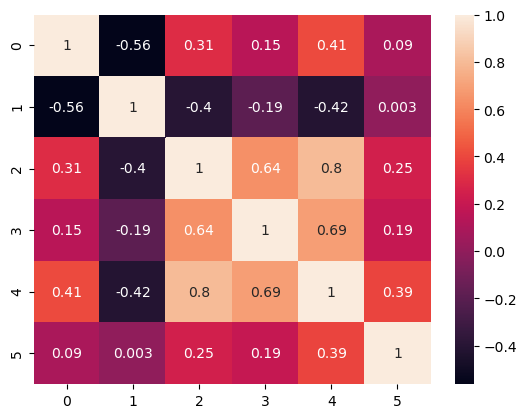

In [93]:
cor = np.corrcoef(params.T)
print(cor)
sns.heatmap(cor, annot=True)

In [94]:
lr = LogisticRegression()

X = params.loc[:,["re_close", "re_open", "my_rsi"]].values
Y = params.loc[:,["up_or_down"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

In [86]:
X.shape

(503, 3)

In [95]:
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
f1_score(y_pred, Y_test)

d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6981132075471698

In [12]:
window_start = 0
window_end = 0

6.689994812011719

In [1]:
yf.download(name, start = "20220701", end = end)

NameError: name 'yf' is not defined

In [16]:
datetime.now()

datetime.datetime(2023, 10, 16, 1, 33, 31, 868576)

In [15]:
stock_datas[0].head()

,Open,High,Low,Close,Adj Close,Volume,Close_price_percentage,real_situation,log_return
Date,,,,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.679932,71250400,0.001892,涨,0.001890
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.182068,65447400,-0.003371,跌,-0.003377
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.007080,68826400,-0.007983,跌,-0.008015
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.302872,64727200,-0.025370,跌,-0.025697
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.341248,69721100,-0.013785,跌,-0.013881


In [6]:
a = ta.log_return(stock_datas[-1]["Close"])

In [9]:
a = a.tolist()

In [10]:
from scipy import stats

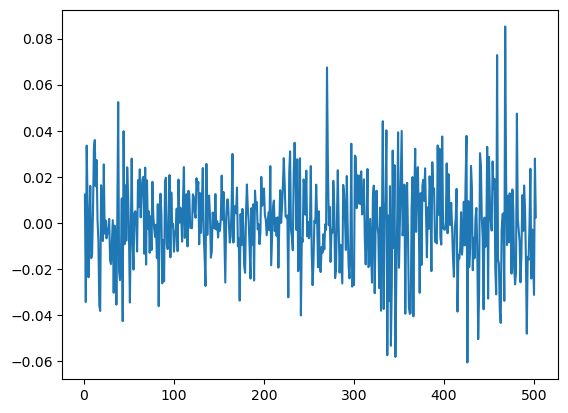

In [14]:
plt.plot(a)

In [11]:
#MACD_12_26
funcs_params = [
    (MACD, None)
]
rate1, holding, strategy1 = test_fun(stock_datas, funcs_params)

#MACD_6_19
funcs_params = [
    (MACD_short, None)
]
rate2, _, strategy2 = test_fun(stock_datas, funcs_params)

#MACD_19_39
funcs_params = [
    (MACD_long, None)
]
rate3, _, strategy3 = test_fun(stock_datas, funcs_params)

#MACD619RSI6_8020
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (6,80,20))
]
rate4, _, strategy4 = test_fun(stock_datas, funcs_params)

#MACD619RSI6_7030
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (6,70,30))
]
rate5, _, strategy5 = test_fun(stock_datas, funcs_params)

#MACD619RSI14_8020
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (6,80,20))
]
rate6, _, strategy6 = test_fun(stock_datas, funcs_params)

#MACD619RSI14_7030
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (14,70,30))
]
rate7, _, strategy7 = test_fun(stock_datas, funcs_params)

#MACD619RSI21_8020
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (21,80,20))
]
rate8, _, strategy8 = test_fun(stock_datas, funcs_params)

#MACD619RSI21_7030
funcs_params = [
    (MACD_short, None), 
    (RSI, None), 
    (RSI_MACD, (21,70,30))
]
rate9, _, strategy9 = test_fun(stock_datas, funcs_params)

#MACD1939RSI6_8020
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (6,80,20))
]
rate10, _, strategy10 = test_fun(stock_datas, funcs_params)

#MACD1939RSI6_7030
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (6,70,30))
]
rate11, _, strategy11 = test_fun(stock_datas, funcs_params)

#MACD1939RSI14_8020
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (14,80,20))
]
rate12, _, strategy12 = test_fun(stock_datas, funcs_params)

#MACD1939RSI14_7030
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (14,70,30))
]
rate13, _, strategy13 = test_fun(stock_datas, funcs_params)

#MACD1939RSI21_8020
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (21,80,20))
]
rate14, _, strategy14 = test_fun(stock_datas, funcs_params)

#MACD1939RSI21_7030
funcs_params = [
    (MACD_long, None), 
    (RSI, None), 
    (RSI_MACD, (21,70,30))
]
rate15, _, strategy15 = test_fun(stock_datas, funcs_params)

#MACD1226RSI6_8020
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (6,80,20))
]
rate16, _, strategy16 = test_fun(stock_datas, funcs_params)

#MACD1226RSI6_7030
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (6,70,30))
]
rate17, _, strategy17 = test_fun(stock_datas, funcs_params)

#MACD1226RSI14_8020
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (14,80,20))
]
rate18, _, strategy18 = test_fun(stock_datas, funcs_params)

#MACD1226RSI14_7030
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (14,70,30))
]
rate19, _, strategy19 = test_fun(stock_datas, funcs_params)

#MACD1226RSI21_8020
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (21,80,20))
]
rate20, _, strategy20 = test_fun(stock_datas, funcs_params)

#MACD1226RSI21_7030
funcs_params = [
    (MACD, None), 
    (RSI, None), 
    (RSI_MACD, (21,70,30))
]
rate21, _, strategy21 = test_fun(stock_datas, funcs_params)

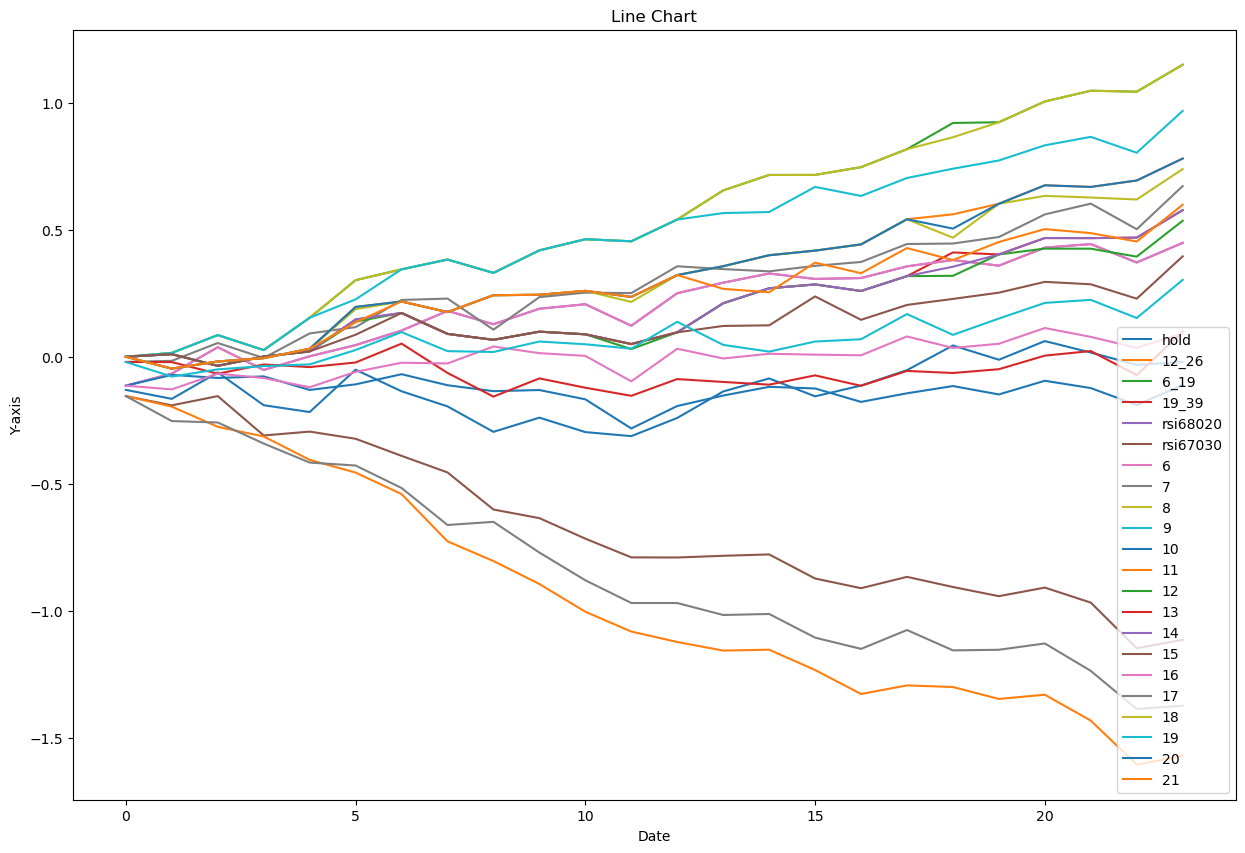

In [12]:
plt.figure(figsize=(15,10))

plt.plot(holding,label="hold")
plt.plot(strategy1,label="12_26")
plt.plot(strategy2,label="6_19")
plt.plot(strategy3,label="19_39")
plt.plot(strategy4,label="rsi68020")
plt.plot(strategy5,label="rsi67030")
plt.plot(strategy6,label="6")
plt.plot(strategy7,label="7")

plt.plot(strategy8,label="8")
plt.plot(strategy9,label="9")

plt.plot(strategy10,label="10")
plt.plot(strategy11,label="11")
plt.plot(strategy12,label="12")
plt.plot(strategy13,label="13")
plt.plot(strategy14,label="14")
plt.plot(strategy15,label="15")
plt.plot(strategy16,label="16")

plt.plot(strategy17,label="17")

plt.plot(strategy18,label="18")
plt.plot(strategy19,label="19")
plt.plot(strategy20,label="20")
plt.plot(strategy21,label="21")
    
plt.legend()

plt.title("Line Chart")
plt.xlabel("Date")
plt.ylabel("Y-axis")
plt.show()

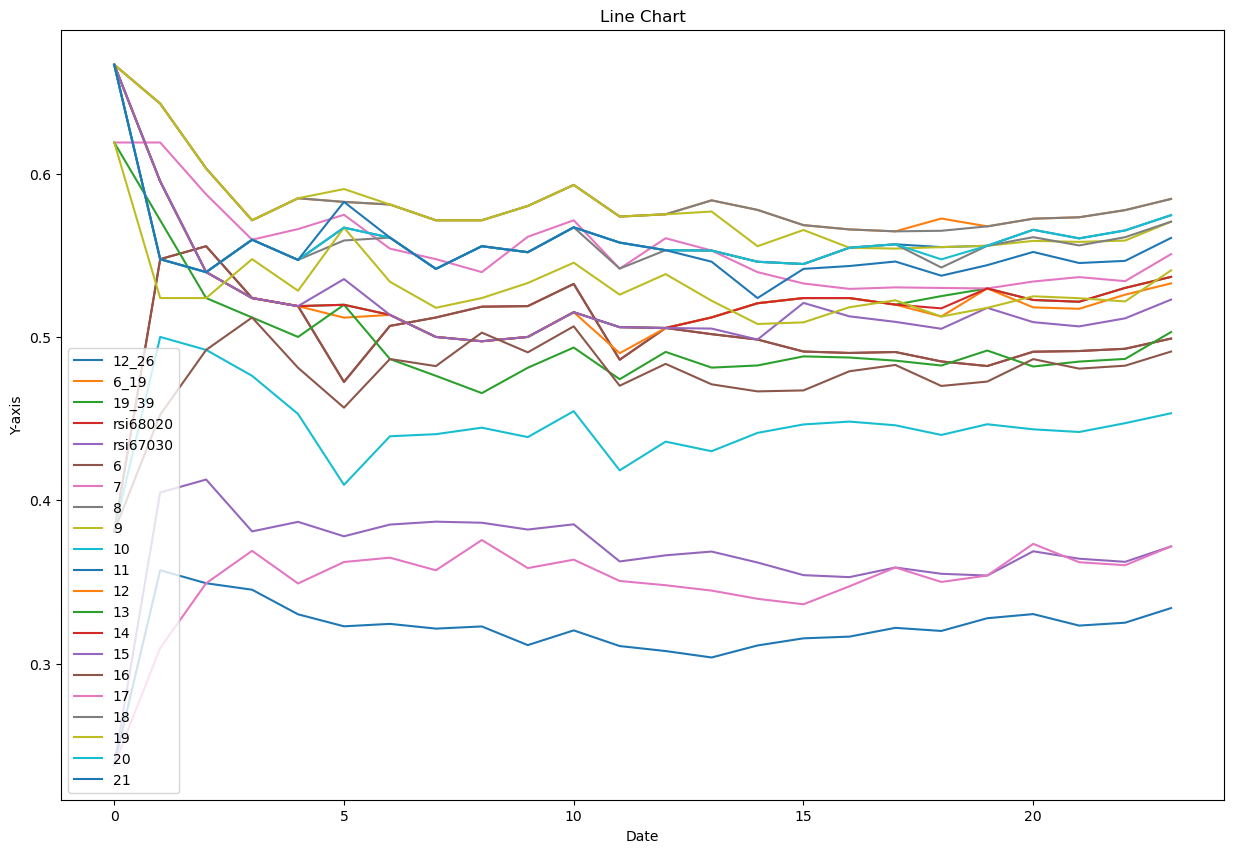

In [13]:
plt.figure(figsize=(15,10))
plt.plot(rate1,label="12_26")
plt.plot(rate2,label="6_19")
plt.plot(rate3,label="19_39")
plt.plot(rate4,label="rsi68020")
plt.plot(rate5,label="rsi67030")

plt.plot(rate6,label="6")
plt.plot(rate7,label="7")
plt.plot(rate8,label="8")
plt.plot(rate9,label="9")
plt.plot(rate10,label="10")
plt.plot(rate11,label="11")
plt.plot(rate12,label="12")
plt.plot(rate13,label="13")
plt.plot(rate14,label="14")
plt.plot(rate15,label="15")

plt.plot(rate16,label="16")
plt.plot(rate17,label="17")


plt.plot(rate18,label="18")
plt.plot(rate19,label="19")
plt.plot(rate20,label="20")
plt.plot(rate21,label="21")


plt.legend()
plt.title("Line Chart")
plt.xlabel("Date")
plt.ylabel("Y-axis")
plt.show()

$$
$$

layer  
ml黑盒  
